In [53]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import secrets
import re
import seaborn as sns
import matplotlib.pyplot as plt
import lyricsgenius
from datetime import datetime

In [4]:
genius = lyricsgenius.Genius(secrets.GENIUS_ACCESS_TOKEN)

In [5]:
def get_billboard_from_year(start_year, end_year):
    years = np.arange(start_year, end_year + 1).astype(int)
    top_songs = pd.DataFrame()

    for i in range(0, len(years)):
        year = years[i]
        print("Collecting songs from %i...", year)
        url = "https://www.billboard.com/charts/year-end/"+ str(year) +"/hot-100-songs"
        
        billboard_page = requests.get(url)
        soup = BeautifulSoup(billboard_page.text, "html.parser")

        titles = [div.text for div in soup.find_all("div", "ye-chart-item__title")]
        ranks = [div.text for div in soup.find_all("div", "ye-chart-item__rank")]
        artists = [div.text for div in soup.find_all("div", "ye-chart-item__artist")]

        for i in range(0, len(ranks)):
            row = {
                "Rank": ranks[i].replace("\n", "").strip(),
                "Song Title": titles[i].replace("\n", "").strip(),
                "Artist": artists[i].replace("\n", "").strip(),
                "Year": int(year)
            }
            top_songs = top_songs.append(row, ignore_index=True)
    return top_songs

In [7]:
all_songs = get_billboard_from_year(2017, 2019)

In [8]:
display(all_songs.head(5))
display(all_songs.tail(5))
display(all_songs.shape)

,Artist,Rank,Song Title,Year
0,Ed Sheeran,1,Shape Of You,2017.0
1,Luis Fonsi & Daddy Yankee Featuring Justin Bieber,2,Despacito,2017.0
2,Bruno Mars,3,That's What I Like,2017.0
3,Kendrick Lamar,4,Humble.,2017.0
4,The Chainsmokers & Coldplay,5,Something Just Like This,2017.0


,Artist,Rank,Song Title,Year
295,Chase Rice,96,Eyes On You,2019.0
296,Dan + Shay,97,All To Myself,2019.0
297,Ariana Grande & Social House,98,Boyfriend,2019.0
298,P!nk,99,Walk Me Home,2019.0
299,Juice WRLD,100,Robbery,2019.0


(300, 4)

In [13]:
starttime = datetime.now()
print("Starting: " + str(starttime))
all_song_data = pd.DataFrame()
for i in range(0, len(all_songs)):
    song = all_songs.iloc[i]

    try:
        song_data = genius.search_song(song['Song Title'], song["Artist"])
#         print(dir(song_data))
        if(song_data):
            song_album = song_data.album
            featured_artists = song_data.featured_artists
            song_lyrics = song_data.lyrics.replace("\n", "")
            song_media = song_data.media
            song_url = song_data.url
            song_writer_artists = song_data.writer_artists
            song_producer_artists = song_data.producer_artists if song_data.producer_artists else ""
            song_album_url = song_data.album_url
            song_release_year = song_data.year
    except:
        song_album = "null"
        song_album_url = "null"
        featured_artists = "null"
        song_lyrics = "null"
        song_media = "null"
        song_url = "null"
        song_writer_artists = "null"
        song_release_year = "null"
        song_producer_artists = song_data.producer_artists
        song_album_url = song_data.album_url
        song_release_year = song_data.year
        
    row = {
        "Year": song['Year'],
        "Charting Rank": song['Rank'],
        "Song Title": song['Song Title'],
        "Artist": song['Artist'],
        "Album": song_album ,
        "Producers": song_producer_artists,
        "Writers": song_writer_artists,
        "Album URL": song_album_url,
        "Featured Artists": featured_artists,
        "Lyrics":  song_lyrics,
        "URL": song_url,
        "Media": song_media,
        "Release Year": song_release_year
    }
    all_song_data = all_song_data.append(row, ignore_index=True)

endtime = datetime.now()
print("Finished Job: " + str(endtime))
print("Elapsed Time: " + str(endtime - starttime))


Starting: 2020-04-26 21:05:07.981381
Searching for "Shape Of You" by Ed Sheeran...
Done.
Searching for "Despacito" by Luis Fonsi & Daddy Yankee Featuring Justin Bieber...
Done.
Searching for "That's What I Like" by Bruno Mars...
Done.
Searching for "Humble." by Kendrick Lamar...
Done.
Searching for "Something Just Like This" by The Chainsmokers & Coldplay...
Done.
Searching for "Bad And Boujee" by Migos Featuring Lil Uzi Vert...
Done.
Searching for "Closer" by The Chainsmokers Featuring Halsey...
Done.
Searching for "Body Like A Back Road" by Sam Hunt...
Done.
Searching for "Believer" by Imagine Dragons...
Done.
Searching for "Congratulations" by Post Malone Featuring Quavo...
Done.
Searching for "Say You Won't Let Go" by James Arthur...
Done.
Searching for "I'm The One" by DJ Khaled Featuring Justin Bieber, Quavo, Chance The Rapper & Lil Wayne...
Done.
Searching for "XO TOUR Llif3" by Lil Uzi Vert...
Done.
Searching for "Mask Off" by Future...
Done.
Searching for "Unforgettable" by Fr

Done.
Searching for "MotorSport" by Migos, Nicki Minaj & Cardi B...
Done.
Searching for "I Like Me Better" by Lauv...
Done.
Searching for "Youngblood" by 5 Seconds Of Summer...
Done.
Searching for "Whatever It Takes" by Imagine Dragons...
Done.
Searching for "Ric Flair Drip" by Offset & Metro Boomin...
Done.
Searching for "I Fall Apart" by Post Malone...
Done.
Searching for "Pray For Me" by The Weeknd & Kendrick Lamar...
Done.
Searching for "Back To You" by Selena Gomez...
Done.
Searching for "Sicko Mode" by Travis Scott...
Done.
Searching for "Walk It Talk It" by Migos Featuring Drake...
Done.
Searching for "Gucci Gang" by Lil Pump...
Done.
Searching for "Him & I" by G-Eazy & Halsey...
Done.
Searching for "In My Blood" by Shawn Mendes...
Done.
Searching for "All The Stars" by Kendrick Lamar & SZA...
Done.
Searching for "Stir Fry" by Migos...
Done.
Searching for "Too Good At Goodbyes" by Sam Smith...
Done.
Searching for "Love." by Kendrick Lamar Featuring Zacari...
Done.
Searching for 

Done.
Searching for "Trampoline" by SHAED...
Done.
Searching for "Leave Me Alone" by Flipp Dinero...
Done.
Searching for "Breathin" by Ariana Grande...
Done.
Searching for "Bury A Friend" by Billie Eilish...
Done.
Searching for "Close Friends" by Lil Baby...
Done.
Searching for "Baby Shark" by Pinkfong...
Done.
Searching for "My Type" by Saweetie...
Done.
Searching for "Worth It" by YK Osiris...
Done.
Searching for "Only Human" by Jonas Brothers...
Done.
Searching for "Knockin' Boots" by Luke Bryan...
Done.
Searching for "Trip" by Ella Mai...
Done.
Searching for "Rumor" by Lee Brice...
Done.
Searching for "Swervin" by A Boogie Wit da Hoodie Featuring 6ix9ine...
Done.
Searching for "How Do You Sleep?" by Sam Smith...
Done.
Searching for "Baby" by Lil Baby & DaBaby...
Done.
Searching for "Look What God Gave Her" by Thomas Rhett...
Done.
Searching for "Good As You" by Kane Brown...
Done.
Searching for "Clout" by Offset Featuring Cardi B...
Done.
Searching for "Love Lies" by Khalid & Norma

,Album,Album URL,Artist,Charting Rank,Featured Artists,Lyrics,Media,Producers,Release Year,Song Title,URL,Writers,Year
0,÷ (Divide),https://genius.com/albums/Ed-sheeran/Divide,Ed Sheeran,1,[],[Verse 1]\nThe club isn't the best place to fi...,"[{'provider': 'youtube', 'start': 0, 'type': '...","[{'api_path': '/artists/12418', 'header_image_...",2017-01-06,Shape Of You,https://genius.com/Ed-sheeran-shape-of-you-lyrics,"[{'api_path': '/artists/7393', 'header_image_u...",2017.0
1,Google Translate Sings,https://genius.com/albums/Malinda/Google-trans...,Luis Fonsi & Daddy Yankee Featuring Justin Bieber,2,[],"[Intro]\nCome at me\nMany priests, the good th...","[{'provider': 'youtube', 'start': 0, 'type': '...",,2017-07-19,Despacito,https://genius.com/Malinda-google-translate-si...,"[{'api_path': '/artists/1460051', 'header_imag...",2017.0
2,24K Magic,https://genius.com/albums/Bruno-mars/24k-magic,Bruno Mars,3,[],"[Verse 1]\nHey, hey, hey\nI got a condo in Man...",[{'native_uri': 'spotify:track:0KKkJNfGyhkQ5aF...,"[{'api_path': '/artists/1012903', 'header_imag...",2016-01-30,That's What I Like,https://genius.com/Bruno-mars-thats-what-i-lik...,"[{'api_path': '/artists/1035208', 'header_imag...",2017.0
3,DAMN.,https://genius.com/albums/Kendrick-lamar/Damn,Kendrick Lamar,4,[],[Intro]\nNobody pray for me\nIt's been that da...,"[{'provider': 'youtube', 'start': 6, 'type': '...","[{'api_path': '/artists/627151', 'header_image...",2017-03-30,Humble.,https://genius.com/Kendrick-lamar-humble-lyrics,"[{'api_path': '/artists/93851', 'header_image_...",2017.0
4,Memories...Do Not Open,https://genius.com/albums/The-chainsmokers/Mem...,The Chainsmokers & Coldplay,5,[],[Verse 1: Chris Martin]\nI've been reading boo...,"[{'provider': 'youtube', 'start': 0, 'type': '...","[{'api_path': '/artists/1030536', 'header_imag...",2017-02-22,Something Just Like This,https://genius.com/The-chainsmokers-and-coldpl...,"[{'api_path': '/artists/150934', 'header_image...",2017.0


(300, 13)

In [17]:
all_song_data.to_pickle(r"stored_song_data.pickle")

In [9]:
all_song_data = pd.read_pickle("stored_song_data.pickle")

In [10]:
display(all_song_data.head(5))
display(all_song_data.shape)

,Album,Album URL,Artist,Charting Rank,Featured Artists,Lyrics,Media,Producers,Release Year,Song Title,URL,Writers,Year
0,÷ (Divide),https://genius.com/albums/Ed-sheeran/Divide,Ed Sheeran,1,[],[Verse 1]\nThe club isn't the best place to fi...,"[{'provider': 'youtube', 'start': 0, 'type': '...","[{'api_path': '/artists/12418', 'header_image_...",2017-01-06,Shape Of You,https://genius.com/Ed-sheeran-shape-of-you-lyrics,"[{'api_path': '/artists/7393', 'header_image_u...",2017.0
1,Google Translate Sings,https://genius.com/albums/Malinda/Google-trans...,Luis Fonsi & Daddy Yankee Featuring Justin Bieber,2,[],"[Intro]\nCome at me\nMany priests, the good th...","[{'provider': 'youtube', 'start': 0, 'type': '...",,2017-07-19,Despacito,https://genius.com/Malinda-google-translate-si...,"[{'api_path': '/artists/1460051', 'header_imag...",2017.0
2,24K Magic,https://genius.com/albums/Bruno-mars/24k-magic,Bruno Mars,3,[],"[Verse 1]\nHey, hey, hey\nI got a condo in Man...",[{'native_uri': 'spotify:track:0KKkJNfGyhkQ5aF...,"[{'api_path': '/artists/1012903', 'header_imag...",2016-01-30,That's What I Like,https://genius.com/Bruno-mars-thats-what-i-lik...,"[{'api_path': '/artists/1035208', 'header_imag...",2017.0
3,DAMN.,https://genius.com/albums/Kendrick-lamar/Damn,Kendrick Lamar,4,[],[Intro]\nNobody pray for me\nIt's been that da...,"[{'provider': 'youtube', 'start': 6, 'type': '...","[{'api_path': '/artists/627151', 'header_image...",2017-03-30,Humble.,https://genius.com/Kendrick-lamar-humble-lyrics,"[{'api_path': '/artists/93851', 'header_image_...",2017.0
4,Memories...Do Not Open,https://genius.com/albums/The-chainsmokers/Mem...,The Chainsmokers & Coldplay,5,[],[Verse 1: Chris Martin]\nI've been reading boo...,"[{'provider': 'youtube', 'start': 0, 'type': '...","[{'api_path': '/artists/1030536', 'header_imag...",2017-02-22,Something Just Like This,https://genius.com/The-chainsmokers-and-coldpl...,"[{'api_path': '/artists/150934', 'header_image...",2017.0


(300, 13)

In [51]:
def plot_count_by_year(dataset):
    ['Year'], ['Rank']
    grouped_dataset = dataset.groupby('Year')
    sns.barplot(y=grouped_dataset['Charting Rank'].count(), x=grouped_dataset.count().index)
    plt.title("Number of songs with Genius data by year")
    plt.ylabel("Number of Songs")

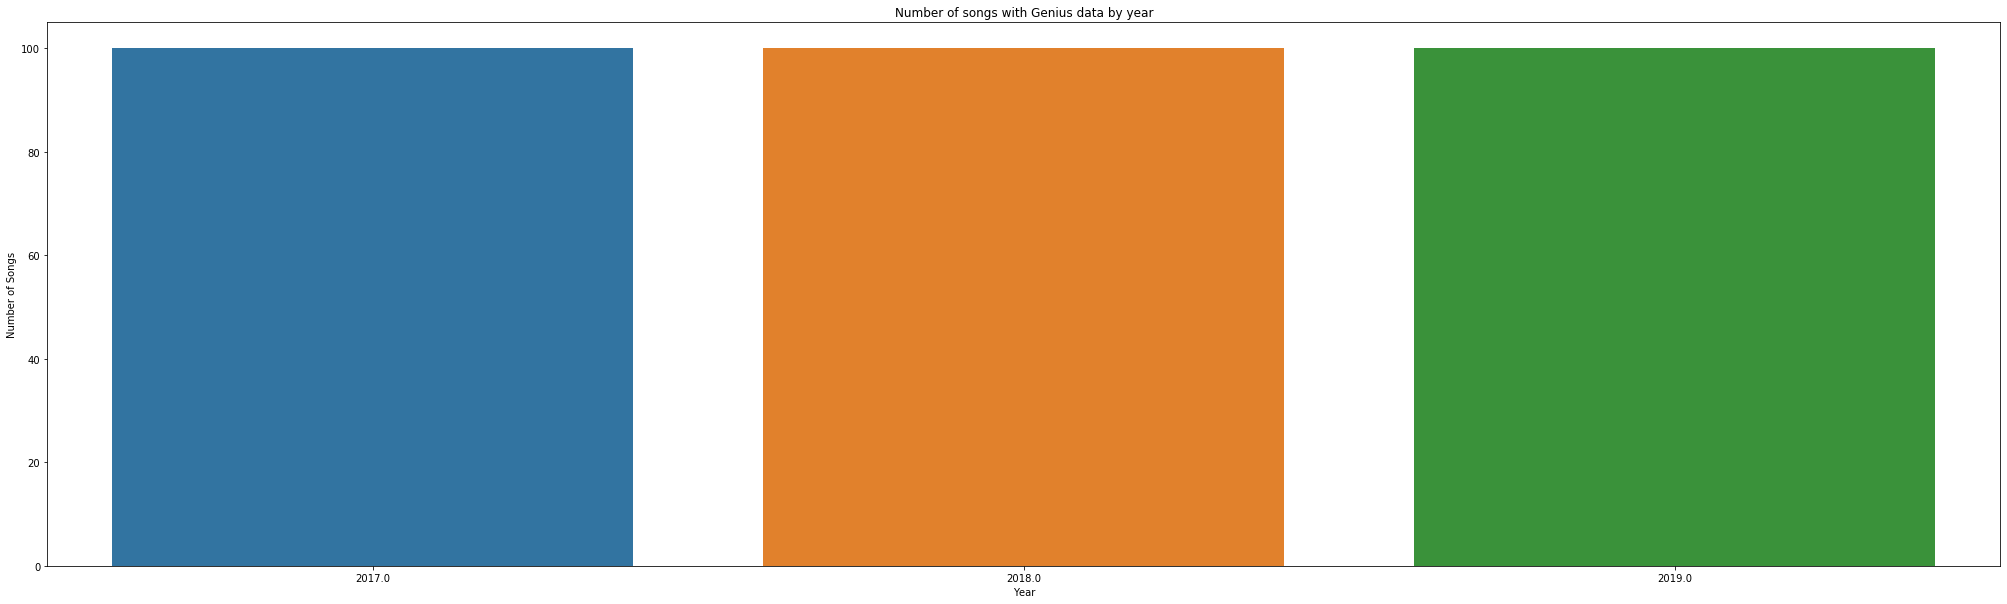

In [54]:
plot_count_by_year(all_song_data )